<a href="https://colab.research.google.com/github/iviiviii/yujin/blob/main/KOPIS_%EA%B8%B0%EA%B0%84%EB%B3%84_%EC%B6%94%EC%84%B8_%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.font_manager as fm
import os
import io

plt.rc('font', family='NanumBarunGothic')

In [4]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [5]:
file1="/content/drive/MyDrive/QMS/3차마프/예매통계_기간별_월별(22.1~22.7).xlsx"
df1=pd.read_excel(file1)
df1

,[예매통계] 기간별통계(월별),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,제공처 : 공연예술통합전산망 www.kopis.or.kr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,검색 기간: 2022.01~2022.07 (최종집계일시 : 2024.01.23 00...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,* 예매통계는 예매일자 기준으로 통계정보를 제공합니다. 티켓을 예매한 일자 기준으로...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,기간,공연건수,NaN,예매 공연횟수,NaN,예매수,NaN,취소수,NaN,총 티켓예매수,NaN,총 티켓예매액,NaN
4,NaN,(건),(%),(편),(%),(회),(%),(건),(%),(건),(%),(천원),(%)
5,2022-01,1686,8.7,11168,11.5,1638105,10.9,649433,11.7,988672,10.4,57493208,10.4
6,2022-02,2022,10.4,10204,10.5,1432787,9.5,659713,11.9,773074,8.1,39618400,7.2
7,2022-03,2481,12.7,11428,11.8,1647102,10.9,676425,12.2,970677,10.2,54164358,9.8
8,2022-04,2903,14.9,13507,13.9,2185842,14.5,787947,14.2,1397895,14.7,82062803,14.9
9,2022-05,3343,17.2,15570,16.1,2462192,16.3,825283,14.9,1636909,17.2,86713055,15.8


In [6]:
file2="/content/drive/MyDrive/QMS/3차마프/예매통계_기간별_월별(22.8~22.12).xlsx"
file3="/content/drive/MyDrive/QMS/3차마프/예매통계_기간별_월별(23.1~23.7).xlsx"
file4="/content/drive/MyDrive/QMS/3차마프/예매통계_기간별_월별(23.8~23.12).xlsx"
df2=pd.read_excel(file2)
df3=pd.read_excel(file3)
df4=pd.read_excel(file4)

2022, 2023 데이터 행 정리 및 합치기




In [7]:
#이 실행은 한번만 해야됨
df1.drop(df1.index[[0,1,2]], axis=0, inplace=True)
df2.drop(df2.index[[0,1,2]], axis=0, inplace=True)
df3.drop(df3.index[[0,1,2]], axis=0, inplace=True)
df4.drop(df4.index[[0,1,2]], axis=0, inplace=True)

In [8]:
df1.columns=['날짜','공연건수(건)','공연건수(%)','예매공연횟수(편)','예매공연횟수(%)','예매수(회)','예매수(%)','취소수(건)','취소수(%)','총티켓예매수(건)','총티켓예매수(%)','총티켓예매액(천원)','총티켓예매액(%)']
df2.columns=['날짜','공연건수(건)','공연건수(%)','예매공연횟수(편)','예매공연횟수(%)','예매수(회)','예매수(%)','취소수(건)','취소수(%)','총티켓예매수(건)','총티켓예매수(%)','총티켓예매액(천원)','총티켓예매액(%)']
df3.columns=['날짜','공연건수(건)','공연건수(%)','예매공연횟수(편)','예매공연횟수(%)','예매수(회)','예매수(%)','취소수(건)','취소수(%)','총티켓예매수(건)','총티켓예매수(%)','총티켓예매액(천원)','총티켓예매액(%)']
df4.columns=['날짜','공연건수(건)','공연건수(%)','예매공연횟수(편)','예매공연횟수(%)','예매수(회)','예매수(%)','취소수(건)','취소수(%)','총티켓예매수(건)','총티켓예매수(%)','총티켓예매액(천원)','총티켓예매액(%)']
df2

,날짜,공연건수(건),공연건수(%),예매공연횟수(편),예매공연횟수(%),예매수(회),예매수(%),취소수(건),취소수(%),총티켓예매수(건),총티켓예매수(%),총티켓예매액(천원),총티켓예매액(%)
3,기간,공연건수,NaN,예매 공연횟수,NaN,예매수,NaN,취소수,NaN,총 티켓예매수,NaN,총 티켓예매액,NaN
4,NaN,(건),(%),(편),(%),(회),(%),(건),(%),(건),(%),(천원),(%)
5,2022-08,3649,18.9,18061,19.5,2649758,18,980028,18.1,1669730,17.9,90985617,17.5
6,2022-09,3811,19.7,17340,18.7,2612601,17.7,895142,16.5,1717459,18.4,85141967,16.4
7,2022-10,4099,21.2,18892,20.4,3162469,21.5,1138743,21,2023726,21.7,125425519,24.1
8,2022-11,4174,21.6,19280,20.8,3321826,22.6,1138935,21,2182891,23.4,124836243,24
9,2022-12,3568,18.5,19119,20.6,2978770,20.2,1258992,23.3,1719778,18.5,93706605,18
10,합계,19301,1,92692,1,14725424,1,5411840,1,9313584,1,520095951,1


In [9]:
df1=df1.drop(['공연건수(%)','예매공연횟수(%)','예매수(%)','취소수(%)','총티켓예매수(%)','총티켓예매액(%)'], axis=1)
df2=df2.drop(['공연건수(%)','예매공연횟수(%)','예매수(%)','취소수(%)','총티켓예매수(%)','총티켓예매액(%)'], axis=1)
df3=df3.drop(['공연건수(%)','예매공연횟수(%)','예매수(%)','취소수(%)','총티켓예매수(%)','총티켓예매액(%)'], axis=1)
df4=df4.drop(['공연건수(%)','예매공연횟수(%)','예매수(%)','취소수(%)','총티켓예매수(%)','총티켓예매액(%)'], axis=1)

In [10]:
#이 실행은 한번만 해야됨
df1.reset_index()
df2.reset_index()
df3.reset_index()
df4.reset_index()
df1.drop(df1.index[[0,1]], axis=0, inplace=True)
df2.drop(df2.index[[0,1]], axis=0, inplace=True)
df3.drop(df3.index[[0,1]], axis=0, inplace=True)
df4.drop(df4.index[[0,1]], axis=0, inplace=True)

In [11]:
df1

,날짜,공연건수(건),예매공연횟수(편),예매수(회),취소수(건),총티켓예매수(건),총티켓예매액(천원)
5,2022-01,1686,11168,1638105,649433,988672,57493208
6,2022-02,2022,10204,1432787,659713,773074,39618400
7,2022-03,2481,11428,1647102,676425,970677,54164358
8,2022-04,2903,13507,2185842,787947,1397895,82062803
9,2022-05,3343,15570,2462192,825283,1636909,86713055
10,2022-06,3526,16673,2851073,877227,1973846,132616845
11,2022-07,3518,18455,2850846,1071212,1779634,97677038
12,합계,19479,97005,15067947,5547240,9520707,550345707


merge

In [12]:
df2022=pd.merge(df1,df2, how='outer', on=['날짜','공연건수(건)','예매공연횟수(편)','예매수(회)','취소수(건)','총티켓예매수(건)','총티켓예매액(천원)'])
df2023=pd.merge(df3,df4, how='outer', on=['날짜','공연건수(건)','예매공연횟수(편)','예매수(회)','취소수(건)','총티켓예매수(건)','총티켓예매액(천원)'])
df2022
df2023

<ipython-input-12-9f2cb0232752>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df2022=pd.merge(df1,df2, how='outer', on=['날짜','공연건수(건)','예매공연횟수(편)','예매수(회)','취소수(건)','총티켓예매수(건)','총티켓예매액(천원)'])
<ipython-input-12-9f2cb0232752>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df2022=pd.merge(df1,df2, how='outer', on=['날짜','공연건수(건)','예매공연횟수(편)','예매수(회)','취소수(건)','총티켓예매수(건)','총티켓예매액(천원)'])
<ipython-input-12-9f2cb0232752>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df2022=pd.merge(df1,df2, how='outer', on=['날짜','공연건수(건)','예매공연횟수(편)','예매수(회)','취소수(건)','총티켓예매수(건)','총티켓예매액(천원)'])
<ipython-input-12-9f2cb0232752>:1: FutureWarning: In a future version, the Index constructor will

,날짜,공연건수(건),예매공연횟수(편),예매수(회),취소수(건),총티켓예매수(건),총티켓예매액(천원)
0,2023-01,2458.0,16262.0,2143209.0,844016.0,1299193.0,70645276.0
1,2023-02,3091.0,15943.0,2180783.0,821646.0,1359137.0,72782646.0
2,2023-03,3712.0,17336.0,2481972.0,867685.0,1614287.0,90616857.0
3,2023-04,3753.0,18159.0,2608441.0,953830.0,1654611.0,98647999.0
4,2023-05,3861.0,18824.0,2792474.0,1064824.0,1727650.0,98649917.0
5,2023-06,3940.0,19050.0,3027343.0,1067480.0,1959863.0,146865895.0
6,2023-07,3814.0,20097.0,2706118.0,989254.0,1716864.0,101048800.0
7,합계,24629.0,125671.0,17940340.0,6608735.0,11331605.0,679257389.0
8,2023-08,4000,20123,2942764,1115467,1827297,104609013
9,2023-09,4219,18149,2599879,929356,1670523,99751040


In [13]:
#이 실행은 한번만 해야됨
#합계 행 삭제 후 다시 만들기
df2022.drop(df2022.index[[7,13]], axis=0, inplace=True)
df2023.drop(df2023.index[[7,13]], axis=0, inplace=True)

In [14]:
df2023

,날짜,공연건수(건),예매공연횟수(편),예매수(회),취소수(건),총티켓예매수(건),총티켓예매액(천원)
0,2023-01,2458.0,16262.0,2143209.0,844016.0,1299193.0,70645276.0
1,2023-02,3091.0,15943.0,2180783.0,821646.0,1359137.0,72782646.0
2,2023-03,3712.0,17336.0,2481972.0,867685.0,1614287.0,90616857.0
3,2023-04,3753.0,18159.0,2608441.0,953830.0,1654611.0,98647999.0
4,2023-05,3861.0,18824.0,2792474.0,1064824.0,1727650.0,98649917.0
5,2023-06,3940.0,19050.0,3027343.0,1067480.0,1959863.0,146865895.0
6,2023-07,3814.0,20097.0,2706118.0,989254.0,1716864.0,101048800.0
8,2023-08,4000,20123,2942764,1115467,1827297,104609013
9,2023-09,4219,18149,2599879,929356,1670523,99751040
10,2023-10,4477,20123,3250953,1162880,2088073,141550621


In [15]:
# 총티켓예매액 단위 : 천원->억원으로 바꾸기
df2022['총티켓예매액(억원)'] = df2022['총티켓예매액(천원)']* 0.00001
df2023['총티켓예매액(억원)'] = df2023['총티켓예매액(천원)']* 0.00001

In [16]:
#이 실행은 한번만 해야됨
#(천원) 열 삭제
df2022.drop('총티켓예매액(천원)', axis=1, inplace=True)
df2023.drop('총티켓예매액(천원)', axis=1, inplace=True)



---


# 시각화 전처리

In [17]:
# 패키지 임포트
import numpy as np # Numpy(넘파이) 패키지 임포트
import pandas as pd # pandas(판다스) 패키지 임포트
import matplotlib.pyplot as plt # Matplotlib(맷플롯립) 패키지의 pyplot 모듈을 plt로 임포트
from matplotlib import rcParams # 한글 환경 설정을 위한 rcParams 임포트
import seaborn as sns # Seaborn(씨본) 패키지 임포트
import warnings
# 한글 환경 설정
def setting_styles_basic():
  rcParams['font.family'] = 'NanumGothic' # Windows
  rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시, 마이너스 기호가 깨지는 현상 방지

setting_styles_basic()

# 경고창 무시
warnings.filterwarnings('ignore')

In [18]:
df2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 12
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   날짜          12 non-null     object
 1   공연건수(건)     12 non-null     object
 2   예매공연횟수(편)   12 non-null     object
 3   예매수(회)      12 non-null     object
 4   취소수(건)      12 non-null     object
 5   총티켓예매수(건)   12 non-null     object
 6   총티켓예매액(억원)  12 non-null     object
dtypes: object(7)
memory usage: 768.0+ bytes


In [19]:
#날짜,억원 제외 모든 열 타입 변경
df2022 = df2022.astype({'공연건수(건)':'int64', '예매공연횟수(편)':'int64', '예매수(회)':'int64',
                       '취소수(건)':'int64','총티켓예매수(건)':'int64'})
df2023 = df2023.astype({'공연건수(건)':'int64', '예매공연횟수(편)':'int64', '예매수(회)':'int64',
                       '취소수(건)':'int64','총티켓예매수(건)':'int64' })

In [20]:
#날짜 형식 변형 (obj->date)
df2022['날짜'] = pd.to_datetime(df2022['날짜'])
df2022['날짜'] = df2022['날짜'].dt.to_period('M')
df2023['날짜'] = pd.to_datetime(df2023['날짜'])
df2023['날짜'] = df2023['날짜'].dt.to_period('M')

In [21]:
df2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 12
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype    
---  ------      --------------  -----    
 0   날짜          12 non-null     period[M]
 1   공연건수(건)     12 non-null     int64    
 2   예매공연횟수(편)   12 non-null     int64    
 3   예매수(회)      12 non-null     int64    
 4   취소수(건)      12 non-null     int64    
 5   총티켓예매수(건)   12 non-null     int64    
 6   총티켓예매액(억원)  12 non-null     object   
dtypes: int64(5), object(1), period[M](1)
memory usage: 768.0+ bytes


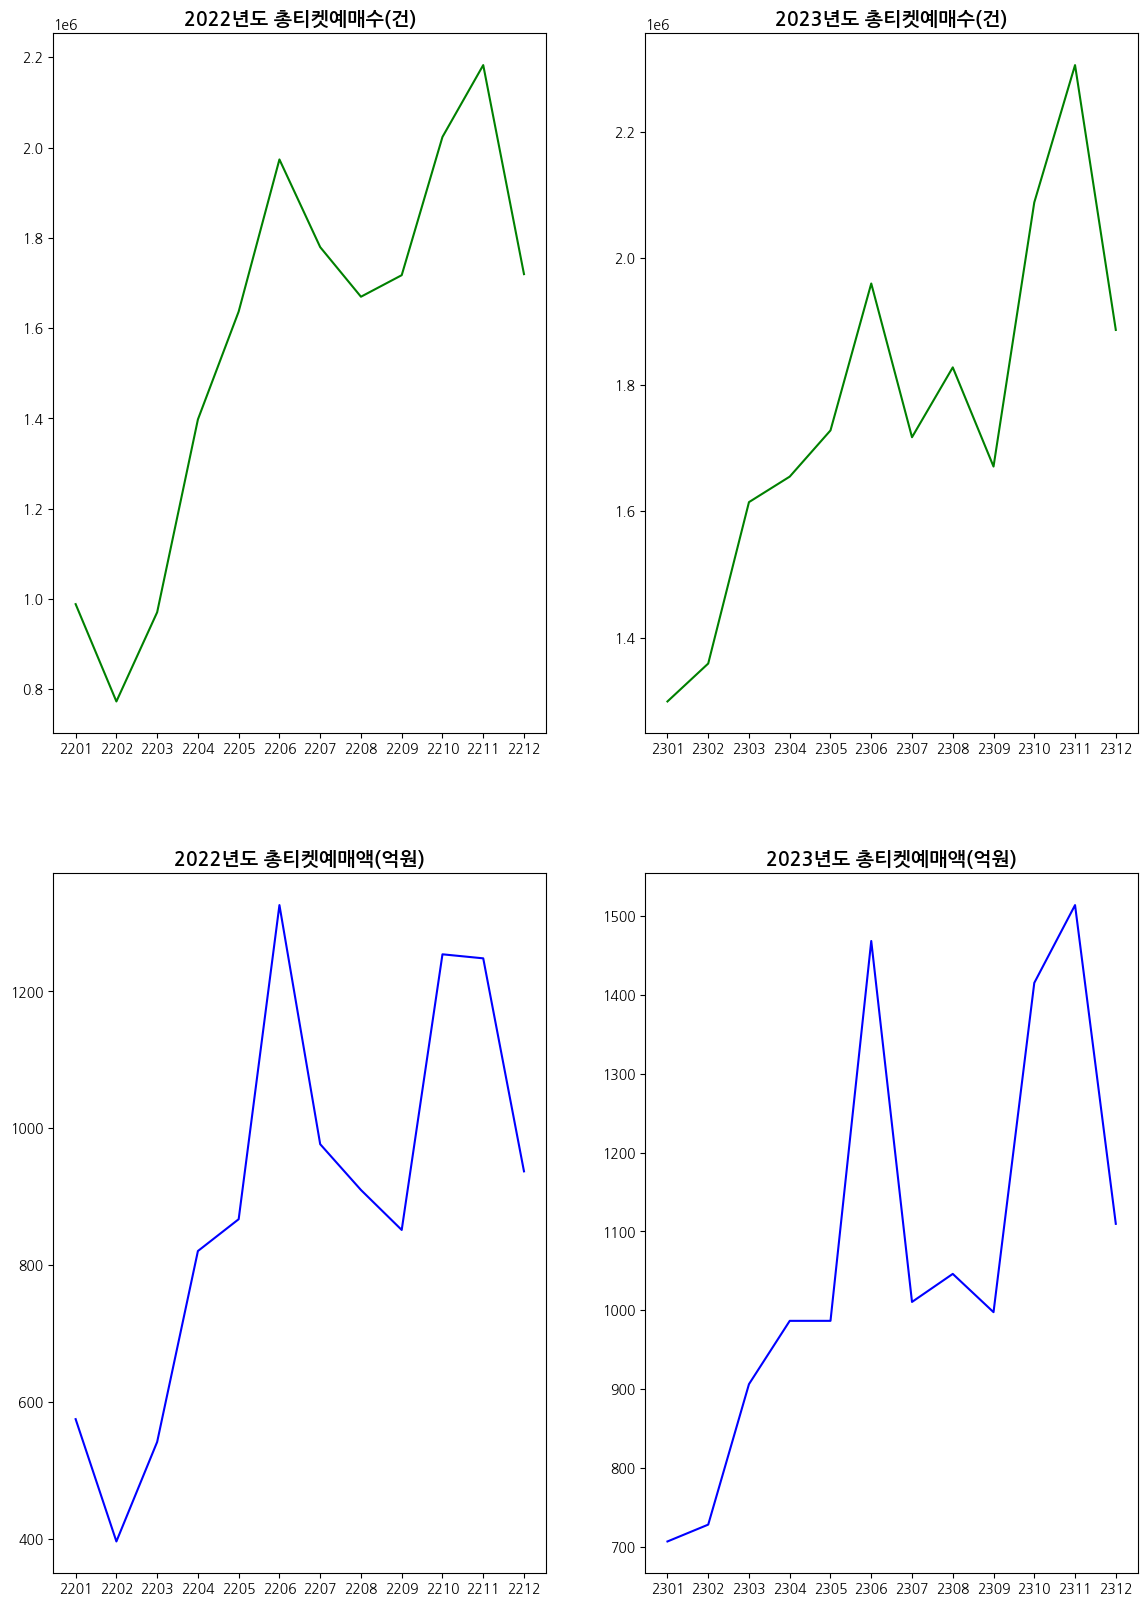

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import font_manager as fm
# 나눔 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# 한글 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'  # 설치한 나눔 폰트의 경로
fontprop = fm.FontProperties(fname=font_path, size=14)
rc('font', family='NanumGothic')

fig, axes = plt.subplots(2, 2, figsize=(14, 20))
axes[0, 0].plot(df2022['날짜'].dt.strftime('%y%m'), df2022['총티켓예매수(건)'], 'g')
axes[0, 1].plot(df2023['날짜'].dt.strftime('%y%m'), df2023['총티켓예매수(건)'], 'g')
axes[1, 0].plot(df2022['날짜'].dt.strftime('%y%m'), df2022['총티켓예매액(억원)'], 'b')
axes[1, 1].plot(df2023['날짜'].dt.strftime('%y%m'), df2023['총티켓예매액(억원)'], 'b')

for i, title in enumerate(['2022년도 총티켓예매수(건)', '2023년도 총티켓예매수(건)',
                           '2022년도 총티켓예매액(억원)', '2023년도 총티켓예매액(억원)']):
    axes[i//2, i%2].set_title(title, fontproperties=fontprop)

plt.show()

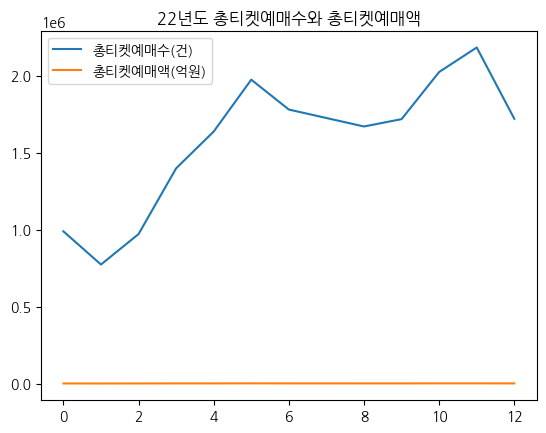

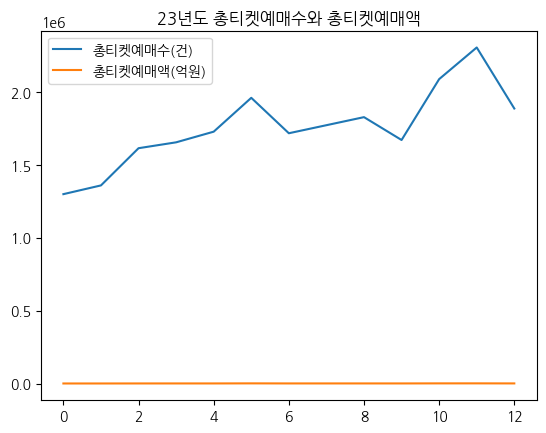

In [23]:
df2022[['총티켓예매수(건)','총티켓예매액(억원)']].plot(title="22년도 총티켓예매수와 총티켓예매액")
df2023[['총티켓예매수(건)','총티켓예매액(억원)']].plot(title="23년도 총티켓예매수와 총티켓예매액")
rc('font', family='NanumGothic')



*   계절성 확인 위해 년도, 월 컬럼 생성



In [24]:
#데이터 하나로 만들기-df2223
df2223=pd.merge(df2022,df2023, how='outer', on=['날짜','공연건수(건)','예매공연횟수(편)',
                                                '예매수(회)','취소수(건)','총티켓예매수(건)',
                                                '총티켓예매액(억원)'])
df2223['year']=df2223['날짜'].dt.year
df2223['month']=df2223['날짜'].dt.month

## 월별에 따른 연도데이터 시각화

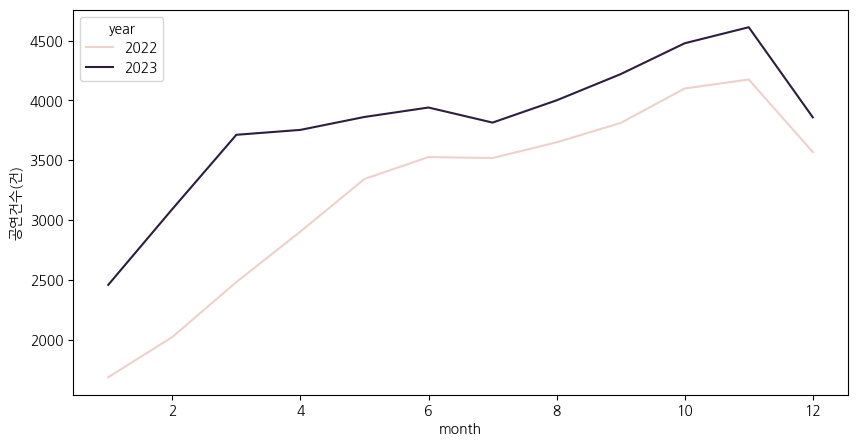

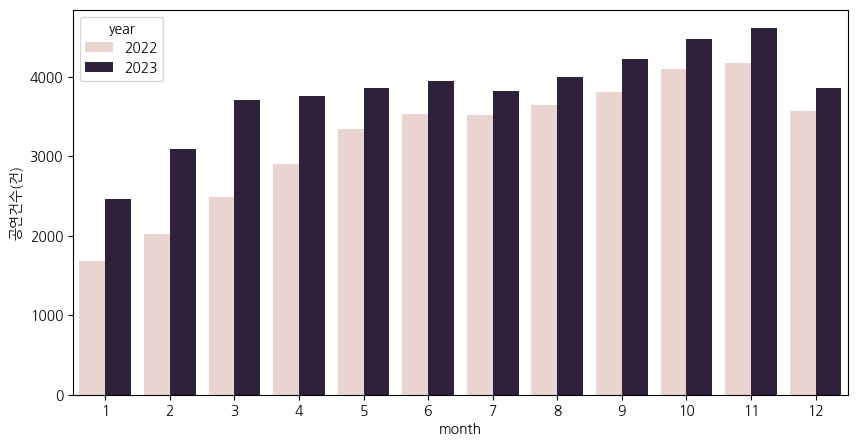

In [25]:
# 월별에 따른 연도데이터 - 공연건수(건)
plt.figure(figsize=(10, 5))
sns.lineplot(data=df2223, x='month', y='공연건수(건)', hue='year')
plt.figure(figsize=(10, 5))
sns.barplot(data=df2223, x='month', y='공연건수(건)', hue='year')
plt.show()

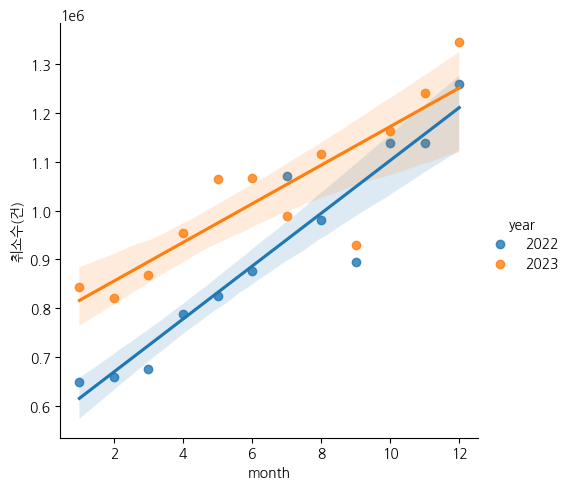

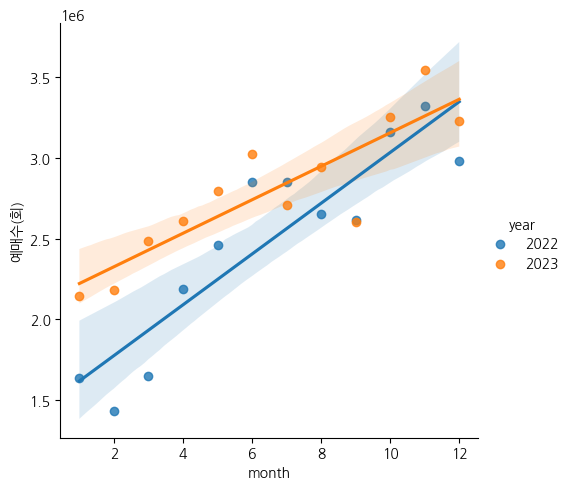

In [26]:
# 월별에 따른 연도데이터 - 취소수 & 예매수

#lmplot - 회귀그래프, 그래프수준(figurelevel)함수로 FacetGrid를 만들수 있음
sns.lmplot(x='month', y='취소수(건)', hue='year',
            data=df2223)
sns.lmplot(x='month', y='예매수(회)', hue='year',
            data=df2223)

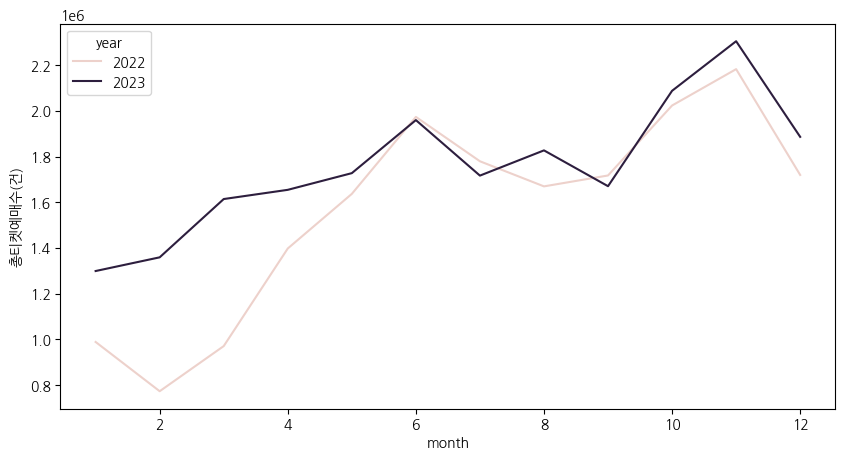

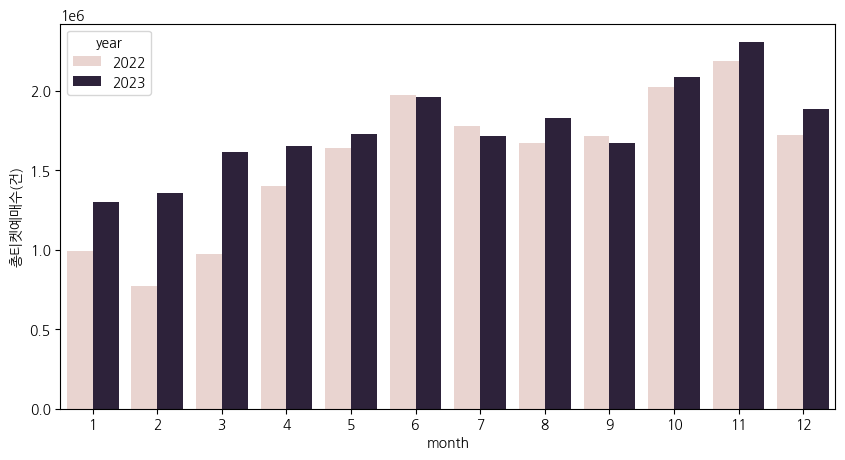

In [27]:
# 월별에 따른 연도데이터 - 총티켓예매수(건)
plt.figure(figsize=(10, 5))
sns.lineplot(data=df2223, x='month', y='총티켓예매수(건)', hue='year')
plt.figure(figsize=(10, 5))
sns.barplot(data=df2223, x='month', y='총티켓예매수(건)', hue='year')
plt.show()

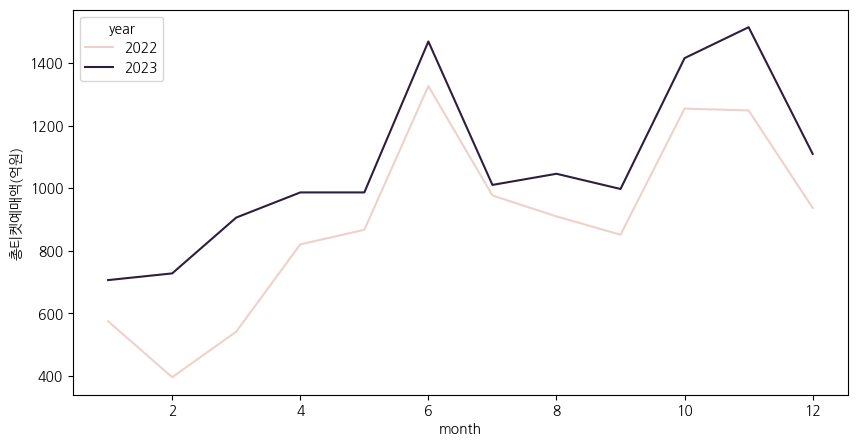

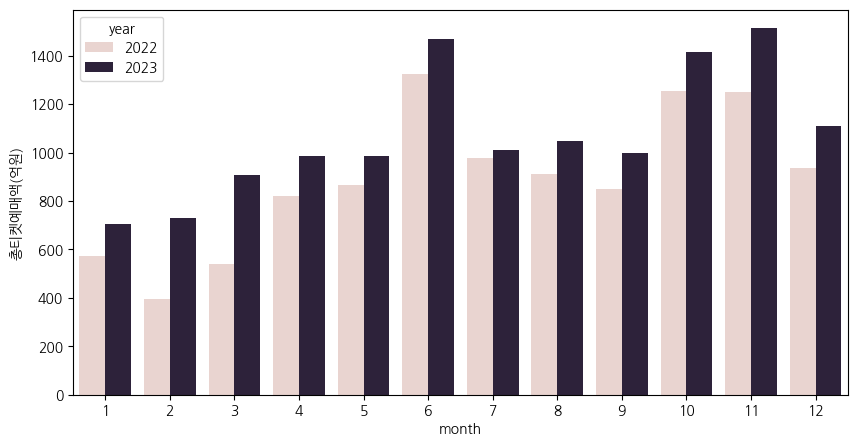

In [28]:
# 월별에 따른 연도데이터 - 총티켓예매액(만원)
plt.figure(figsize=(10, 5))
sns.lineplot(data=df2223, x='month', y='총티켓예매액(억원)', hue='year')
plt.figure(figsize=(10, 5))
sns.barplot(data=df2223, x='month', y='총티켓예매액(억원)', hue='year')
plt.show()